In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [9]:
plt.style.use('seaborn')

In [14]:
X = pd.read_csv('Diabetes_XTrain.csv').values
Y = pd.read_csv('Diabetes_YTrain.csv').values.reshape((-1,))
print(Y.shape)
print(X.shape)

(576,)
(576, 8)


In [15]:
print(X)
print(Y)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]
[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0

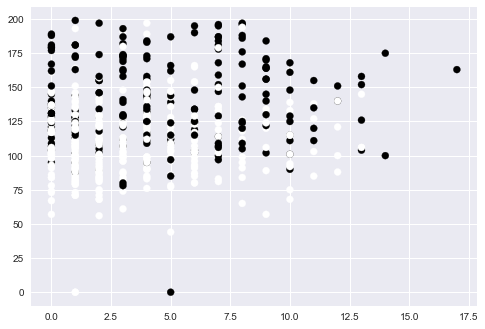

In [16]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

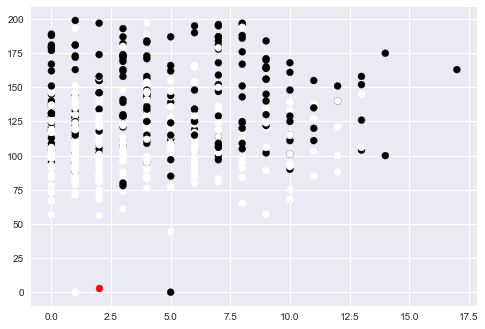

In [17]:
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [18]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [25]:
# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [26]:
x_test=pd.read_csv('Diabetes_Xtest.csv').values

In [27]:
ans= []
for i in range(x_test.shape[0]):
    n = knn(X,Y,x_test[i], k=10)
    ans.append(n)
print(ans)

[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [25]:
x = knn(X,Y,[2,3])

ValueError: operands could not be broadcast together with shapes (2,) (8,) 